In [1]:
from ase.build import graphene, make_supercell, add_vacuum, molecule, add_adsorbate
from ase.visualize import view
from ase.io import write, read
from ase.build.supercells import clean_matrix

import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

In [2]:
def print_xyz1(name, slab):
    print(name)
    print(slab)
    fig, axarr = plt.subplots(1, 4, figsize=(15, 5))
    
    plot_atoms(slab, axarr[0], radii=0.3, rotation=('0x,0y,0z'))
    plot_atoms(slab, axarr[1], radii=0.3, rotation=('-90x,0y,0z'))
    plot_atoms(slab, axarr[2], radii=0.3, rotation=('-90x,-90y,0z'))
    plot_atoms(slab, axarr[3], radii=0.3, rotation=('-45x,0y,0z'))
    
    axarr[0].set_title("Top view")
    axarr[0].set_xlabel("X-axis, [$\mathrm{\AA}$]")
    axarr[0].set_ylabel("Y-axis, [$\mathrm{\AA}$]")
    
    axarr[1].set_title("Side view")
    axarr[1].set_xlabel("X-axis, [$\mathrm{\AA}$]")
    axarr[1].set_ylabel("Z-axis, [$\mathrm{\AA}$]")
    
    axarr[2].set_title("Side view")
    axarr[2].set_xlabel("Y-axis, [$\mathrm{\AA}$]")
    axarr[2].set_ylabel("Z-axis, [$\mathrm{\AA}$]")
    
    axarr[3].set_title("Diagonal view")
    axarr[3].set_axis_off()
    
    fig.savefig(name+'.png')
    return

In [3]:
def print_xyz2(name, slab):
    print(name)
    print(slab)
    fig, axarr = plt.subplots(1, 4, figsize=(15, 5))

    plot_atoms(slab, axarr[0], radii=0.3, rotation=('0x,0y,0z'))

    plot_atoms(slab, axarr[1], radii=0.3, rotation=('-90x,0y,0z'))

    plot_atoms(slab, axarr[2], radii=0.3, rotation=('-90x,-90y,0z'))

    plot_atoms(slab, axarr[3], radii=0.3, rotation=('-70x,35y,12z'))

    axarr[0].set_title("Top view")
    axarr[0].set_xlabel("X-axis, [$\mathrm{\AA}$]")
    axarr[0].set_ylabel("Y-axis, [$\mathrm{\AA}$]")

    axarr[1].set_title("Side view")
    axarr[1].set_xlabel("X-axis, [$\mathrm{\AA}$]")
    axarr[1].set_ylabel("Z-axis, [$\mathrm{\AA}$]")

    axarr[2].set_title("Side view")
    axarr[2].set_xlabel("Y-axis, [$\mathrm{\AA}$]")
    axarr[2].set_ylabel("Z-axis, [$\mathrm{\AA}$]")

    axarr[3].set_title("Diagonal view")
    axarr[3].set_axis_off()
    return

In [4]:
surf_hexa = graphene(vacuum=8)

hexa
Atoms(symbols='C2', pbc=[True, True, False], cell=[[2.46, 0.0, 0.0], [-1.23, 2.130422493309719, 0.0], [0.0, -0.0, 16.0]])


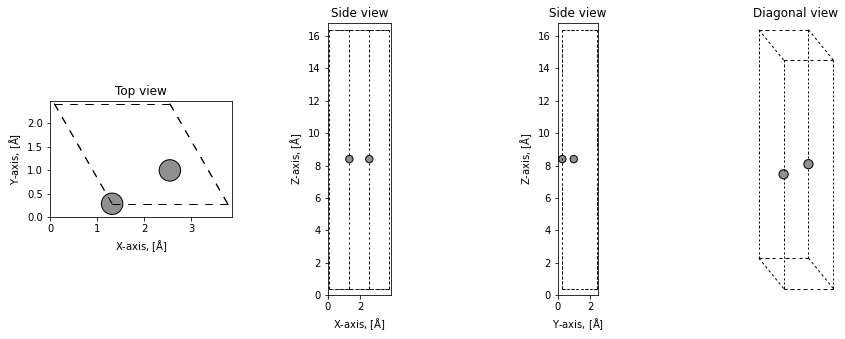

In [5]:
name = 'hexa'
print_xyz1(name, surf_hexa)
#write(name, surf_hexa, format='cif')

In [6]:
# add N2 molecule
mol = molecule('N2')
surf_hexa_N2 = surf_hexa.copy()
add_adsorbate(surf_hexa_N2, mol, height=3, position=(-0.5,1.5), mol_index=0)
print(surf_hexa_N2)

Atoms(symbols='C2N2', pbc=[True, True, False], cell=[[2.46, 0.0, 0.0], [-1.23, 2.130422493309719, 0.0], [0.0, -0.0, 16.0]])


surf_hexa_N2
Atoms(symbols='C2N2', pbc=[True, True, False], cell=[[2.46, 0.0, 0.0], [-1.23, 2.130422493309719, 0.0], [0.0, -0.0, 16.0]])


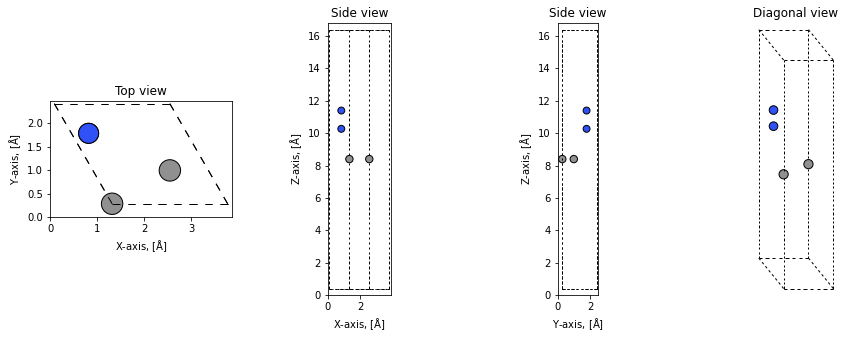

In [7]:
name = 'surf_hexa_N2'
#write(name, surf_hexa_N2, format='cif')
print_xyz1(name, surf_hexa_N2)

In [8]:
# preparation for orthogonal cell
from numpy import array, matmul, append, vstack
from scipy import linalg

In [9]:
# O = P * H #definition of P
P =  [[ 1.0,  0.0,  0.0],
      [ 1.0,  2.0,  0.0],
      [ 0.0,  0.0,  1.0]]
P_inv = clean_matrix(linalg.inv(P))

print('P = ')
print(P)
print('P_inv = ')
print(P_inv)

P = 
[[1.0, 0.0, 0.0], [1.0, 2.0, 0.0], [0.0, 0.0, 1.0]]
P_inv = 
[[ 1.   0.   0. ]
 [-0.5  0.5  0. ]
 [ 0.   0.   1. ]]


In [10]:
#print(surf_hexa)
#print(surf_hexa_N2)
surf_hexa_use = surf_hexa_N2
#H = surf_hexa_N2.get_cell()[:3, :3]
H = surf_hexa_use
print('H_cell = ')
print(H.cell)

H_cell = 
Cell([[2.46, 0.0, 0.0], [-1.23, 2.130422493309719, 0.0], [0.0, -0.0, 16.0]])


In [11]:
O_cell = matmul(P,H.cell) # Transformation from hexagonal to orthogonal
print('O_cell =')
print(O_cell)

O_cell =
[[ 2.46        0.          0.        ]
 [ 0.          4.26084499  0.        ]
 [ 0.          0.         16.        ]]


In [12]:
# LAT: this cell looks OK 
H_pos_cart = H.positions

print('H.positions = ')
print(H.positions)
print('H.get_scaled_positions = ')
print(H.get_scaled_positions())

H_pos_frac = matmul(H_pos_cart, linalg.inv(H.cell))

print('H_pos_cartesian = ')
print(H_pos_cart)

print('H_pos_fractional = ')
print(H_pos_frac)

H.positions = 
[[ 0.          0.          8.        ]
 [ 1.23        0.71014083  8.        ]
 [-0.5         1.5        11.        ]
 [-0.5         1.5         9.87002   ]]
H.get_scaled_positions = 
[[0.         0.         0.5       ]
 [0.66666667 0.33333333 0.5       ]
 [0.14879081 0.70408569 0.6875    ]
 [0.14879081 0.70408569 0.61687625]]
H_pos_cartesian = 
[[ 0.          0.          8.        ]
 [ 1.23        0.71014083  8.        ]
 [-0.5         1.5        11.        ]
 [-0.5         1.5         9.87002   ]]
H_pos_fractional = 
[[0.         0.         0.5       ]
 [0.66666667 0.33333333 0.5       ]
 [0.14879081 0.70408569 0.6875    ]
 [0.14879081 0.70408569 0.61687625]]


In [13]:
O_pos_frac = matmul(H_pos_frac,P_inv)
O_pos_cart = matmul(O_pos_frac,O_cell)

print('O_pos_fractional = ')
print(O_pos_frac)
print('O_pos_cartesian = ')
print(O_pos_cart)

O_pos_fractional = 
[[ 0.          0.          0.5       ]
 [ 0.5         0.16666667  0.5       ]
 [-0.20325203  0.35204285  0.6875    ]
 [-0.20325203  0.35204285  0.61687625]]
O_pos_cartesian = 
[[ 0.          0.          8.        ]
 [ 1.23        0.71014083  8.        ]
 [-0.5         1.5        11.        ]
 [-0.5         1.5         9.87002   ]]


In [14]:
# To duplicate in the (x,y) plan use the translation vector (frac. coord)
pos_trans = array([0.5,0.5,0.0])

# To extract number of pos
n_pos, tmp, = O_pos_frac.shape

# Loop over pos, duplicate and append in O_pos_frac
for n in range(n_pos):
    O_pos_dupl = O_pos_frac[n,:] + pos_trans
    O_pos_frac = vstack([O_pos_frac,O_pos_dupl])
print(O_pos_frac)

# Compute Cartesian coord. again
O_pos_cart = matmul(O_pos_frac,O_cell)
print(O_pos_cart)

# Duplicate symbols:
symbols_dupl = H.symbols
symbols_dupl = str(symbols_dupl)*2
print(symbols_dupl)

[[ 0.          0.          0.5       ]
 [ 0.5         0.16666667  0.5       ]
 [-0.20325203  0.35204285  0.6875    ]
 [-0.20325203  0.35204285  0.61687625]
 [ 0.5         0.5         0.5       ]
 [ 1.          0.66666667  0.5       ]
 [ 0.29674797  0.85204285  0.6875    ]
 [ 0.29674797  0.85204285  0.61687625]]
[[ 0.          0.          8.        ]
 [ 1.23        0.71014083  8.        ]
 [-0.5         1.5        11.        ]
 [-0.5         1.5         9.87002   ]
 [ 1.23        2.13042249  8.        ]
 [ 2.46        2.84056332  8.        ]
 [ 0.73        3.63042249 11.        ]
 [ 0.73        3.63042249  9.87002   ]]
C2N2C2N2


In [15]:
# combine the avobe / now use duplicated symbols
from ase import Atoms
Ortho = Atoms(symbols      = symbols_dupl,
                  positions= O_pos_cart,
                  cell     = O_cell,
                  pbc      = H.pbc)

# wrap positions into the unit cell
Ortho_wrap = Ortho.copy()
Ortho_wrap.wrap()

[[ 0.          0.          8.        ]
 [ 1.23        0.71014083  8.        ]
 [-0.5         1.5        11.        ]
 [-0.5         1.5         9.87002   ]
 [ 1.23        2.13042249  8.        ]
 [ 2.46        2.84056332  8.        ]
 [ 0.73        3.63042249 11.        ]
 [ 0.73        3.63042249  9.87002   ]]
surf_hexa_N2
Atoms(symbols='C2N2', pbc=[True, True, False], cell=[[2.46, 0.0, 0.0], [-1.23, 2.130422493309719, 0.0], [0.0, -0.0, 16.0]])
Ortho
Atoms(symbols='C2N2C2N2', pbc=[True, True, False], cell=[2.46, 4.260844986619438, 16.0])
Ortho_wrap
Atoms(symbols='C2N2C2N2', pbc=[True, True, False], cell=[2.46, 4.260844986619438, 16.0])


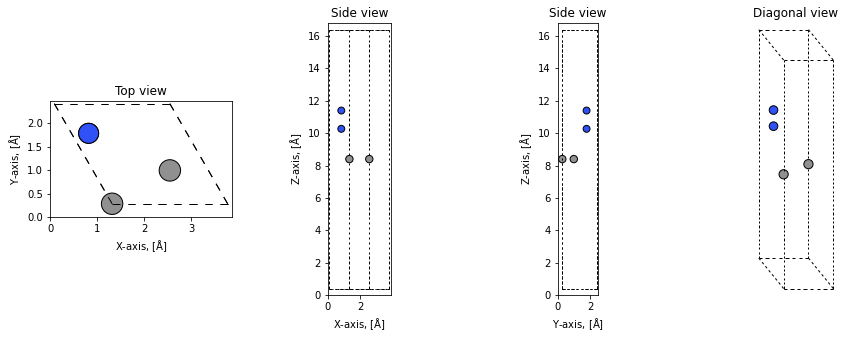

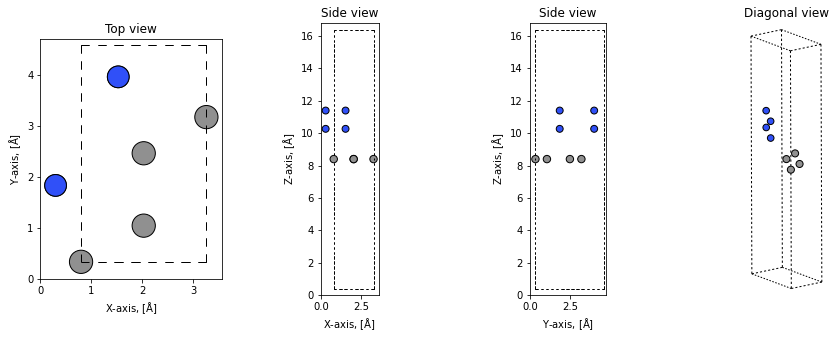

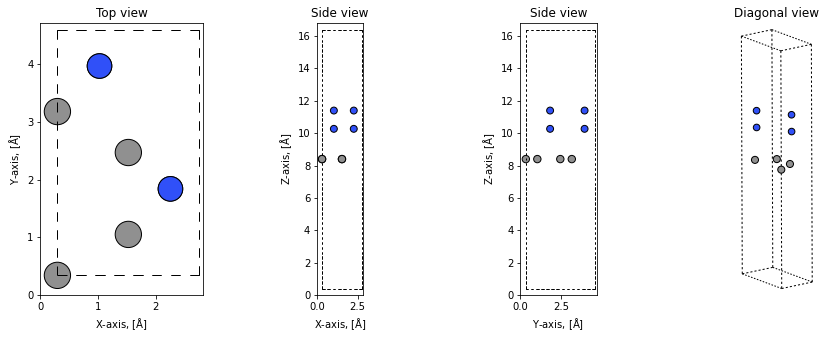

In [16]:
print(Ortho.positions)
print_xyz1('surf_hexa_N2', surf_hexa_N2)
print_xyz2('Ortho', Ortho)
print_xyz2('Ortho_wrap', Ortho_wrap)